# Boxplots

(c) 2023-2024 Nick Falk, Rob Edwards

These boxplots are based on Nick's boxplot data, but this uses the "new" format taxonomy data that is the same for MGI and MinION

**Note:** This data uses the raw counts, so if there is a read present we will report that as being detected!

In [47]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [48]:
df = pd.read_csv("../MinION/Taxonomy/Minion_read_based_annotations_species_rawcounts.tsv.gz", sep='\t', compression='gzip')
df = df[df['taxonomy'].str.contains('k__Bacteria')]
df = df[~df['taxonomy'].str.endswith('s__')]
df = df[~df['taxonomy'].str.contains('g__;')]
genus_otu = df.set_index('taxonomy')
genus_otu.index = genus_otu.index.str.split(';').str[-1].str.replace('s__', '')
genus_otu.head()

,825012_20181120_S,698917_20171207_S,1586713_20180309_S,748160_20180321_S,1593973_20180504_S,1316979_20171215_S,756934_20181218_S,983493_20180123_S,892355_20180123_S,1651490_20171010_S,...,788707_20180313_S,1565754_20180403_S,639354_20171206_S,1593973_20180427_S,788707_20171213_S,1316935_20180417_S,1565754_20171128_S,785991_20180321_S,658355_20171204_S,748699_20180410_S
taxonomy,,,,,,,,,,,,,,,,,,,,,
Candidatus Stahlbacteria bacterium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Candidatus Chromulinivorax destructor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bradymonas sediminis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Microvenator marinus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Candidatus Acidulodesulfobacterium acidiphilum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Normalization/Transformation
# Square root transform
sqrt_genus = np.sqrt(genus_otu)

# Transpose the taxa table
genus_otu2 = sqrt_genus.T
genus_otu2.head()

taxonomy,Candidatus Stahlbacteria bacterium,Candidatus Chromulinivorax destructor,Bradymonas sediminis,Microvenator marinus,Candidatus Acidulodesulfobacterium acidiphilum,Acanthopleuribacter pedis,Candidatus Sulfopaludibacter sp. SbA4,Edaphobacter aggregans,Granulicella sp. WH15,Candidatus Sulfotelmatobacter sp. SbA7,...,Pelagicoccus mobilis,Puniceicoccus vermicola,Chthoniobacter flavus,Pedosphaera sp. Tous-C6FEB,Akkermansia muciniphila,Akkermansia sp.,Brevifollis gellanilyticus,Luteolibacter marinus,Verrucomicrobium sp. GAS474,Candidatus Eremiobacter sp. RRmetagenome_bin22
825012_20181120_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698917_20171207_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1586713_20180309_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
748160_20180321_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1593973_20180504_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
with open('genus_species.txt', 'w') as out:
    print("\n".join(sorted(list(genus_otu2.columns))), file=out)

In [51]:
# Load metadata table
# This is generic so we can copy/paste. Yes, it should be a function, but its not.

sequence_type = 'minion_ID'
#sequence_type = 'MGI_ID'

metadata = pd.read_csv("../Metadata/CF_Metadata_Table-JCJ-OD-v-2023-03-23-1352.tsv.gz", encoding='utf-8', sep="\t", compression='gzip', index_col=0)
metadata = metadata[~metadata[sequence_type].isna()]
todrop = []
for s in metadata[sequence_type]:
    if s not in genus_otu2.index:
        print(f"ERROR: {s} not found in data frame, dropped from metadata", file=sys.stderr)
        todrop.append(s)

metadata.drop(todrop, inplace=True)

todrop = []
for s in genus_otu2.index:
    if not metadata[sequence_type].str.contains(s).any():
        print(f"ERROR: {s} not found in metadata, dropped from dataframe", file=sys.stderr)
        todrop.append(s)
genus_otu2.drop(todrop, inplace=True)
        
if metadata.shape[0] != genus_otu2.shape[0]:
    print(f"ERROR: we have {metadata.shape[0]} rows in metadata and {genus_otu2.shape[0]} data rows", file=sys.stderr)
metadata.head()

ERROR: 770590_20170925_S not found in data frame, dropped from metadata


,minion_ID,MGI_ID,minion_ID_mismatch_YN,MGI_ID_mismatch_YN,Patient.x,Date.x,IP vs OP,Hospital,Room,Age,...,3 Omalizumab_SC,"3 piperacillin sodium, tazobactam sodium (Tazocin)_IV",2 prednisolone_PO,1 Sulfamethoxazole – trimethoprim (Bactrim)_PO,3 tobramycin_IV,2 tobramycin_INH,Sum of antibiotics,Sum of meds,Sum of antifungals,Sum of steroid + mabs
unique_ID,,,,,,,,,,,,,,,,,,,,,
623361_20180123_S,623361_20180123_S,623361_20180123_S,0,0,623361,2018-01-23T00:00:00Z,OP,RAH,Chest Clinic 9,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
639354_20171206_S,639354_20171206_S,639354_20171206_S,0,0,639354,2017-12-06T00:00:00Z,IP,WCH,Adolescent 10,17,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
642660_20180601_S,642660_20180601_S,642660_20180601_S,0,0,642660,2018-06-01T00:00:00Z,IP,WCH,Adol Rm 11,17,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0
650003_20180207_S,650003_20180207_S,650003_20180207_S,0,0,650003,2018-02-07T00:00:00Z,IP,WCH,Adol Room 1,17,...,0.0,0.0,0.0,0.0,1.0,0.0,5.0,5.0,0.0,0.0
658355_20171204_S,658355_20171204_S,658355_20171204_S,0,0,658355,2017-12-04T00:00:00Z,OP,WCH,Gilbert S Meeting,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Add "X" character to the beginning of each row name in the metadata table
# We skip this, because it is an R thing, I don't think you can have indexes that start with integers in R?
# metadata.index = 'X' + metadata.index.astype(str)

In [53]:
# Merge the taxa table and metadata table by the shared row names
merged1 = pd.merge(metadata, genus_otu2, left_index=True, right_index=True)
merged1.head()

,minion_ID,MGI_ID,minion_ID_mismatch_YN,MGI_ID_mismatch_YN,Patient.x,Date.x,IP vs OP,Hospital,Room,Age,...,Pelagicoccus mobilis,Puniceicoccus vermicola,Chthoniobacter flavus,Pedosphaera sp. Tous-C6FEB,Akkermansia muciniphila,Akkermansia sp.,Brevifollis gellanilyticus,Luteolibacter marinus,Verrucomicrobium sp. GAS474,Candidatus Eremiobacter sp. RRmetagenome_bin22
623361_20180123_S,623361_20180123_S,623361_20180123_S,0,0,623361,2018-01-23T00:00:00Z,OP,RAH,Chest Clinic 9,18,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.414214
639354_20171206_S,639354_20171206_S,639354_20171206_S,0,0,639354,2017-12-06T00:00:00Z,IP,WCH,Adolescent 10,17,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
642660_20180601_S,642660_20180601_S,642660_20180601_S,0,0,642660,2018-06-01T00:00:00Z,IP,WCH,Adol Rm 11,17,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000
650003_20180207_S,650003_20180207_S,650003_20180207_S,0,0,650003,2018-02-07T00:00:00Z,IP,WCH,Adol Room 1,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
658355_20171204_S,658355_20171204_S,658355_20171204_S,0,0,658355,2017-12-04T00:00:00Z,OP,WCH,Gilbert S Meeting,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [54]:
# Note, python allows spaces in column names!
culture_columns = [
    'CS_Pseudomonas aeruginosa',
    'CS_Stenophotomonas maltophilia',
    'NTM',
    'CS_Mycobacteroides abscessus',
    'CS_Mycobacterium intracellulare',
    'CS_Staphylococcus  aureus',
    'CS_Achromobacter xylosoxidans',
    'CS_Burkholderia cepacia',
    'CS_Haemophilus influenzae'
]

culture_pairs = {
    'CS_Pseudomonas aeruginosa' : 'Pseudomonas aeruginosa',
    'CS_Stenophotomonas maltophilia': 'Stenotrophomonas maltophilia',
    'NTM' : 'Mycobacterium avium',
    'CS_Mycobacteroides abscessus' : 'Mycobacteroides abscessus',
    'CS_Mycobacterium intracellulare' : 'Mycobacterium avium',
    'CS_Staphylococcus  aureus' : 'Staphylococcus aureus',
    'CS_Achromobacter xylosoxidans' : 'Achromobacter xylosoxidans',
    'CS_Burkholderia cepacia' : 'Burkholderia cepacia',
    'CS_Haemophilus influenzae' : 'Haemophilus influenzae'
}


# we don't need to convert to categories.
for col in culture_columns:
    merged1[col] = merged1[col].astype('category')


In [55]:
# Step 2: Create Boxplots
def create_boxplot(data, culture_taxa, taxa):
    subset_data = data[data[culture_taxa].notna()]
    plt.figure(figsize=(10, 6))
    # sns.boxplot(x=culture_taxa, y=taxa, data=subset_data, color='black', boxprops=dict(facecolor='white'))
    sns.violinplot(x=culture_taxa, y=taxa, data=subset_data, hue=culture_taxa, palette='rocket_r', alpha=0.5, legend=False)
    sns.stripplot(x=culture_taxa, y=taxa, data=subset_data, color='black', jitter=True, alpha=0.5, legend=False)
    plt.title("")
    plt.xlabel("")
    plt.ylabel("Abundance in Patient")
    plt.xticks(ticks=[0, 1], labels=["Negative Culture", "Positive Culture"])
    plt.grid(False)
    plt.tight_layout()
    plt.show()

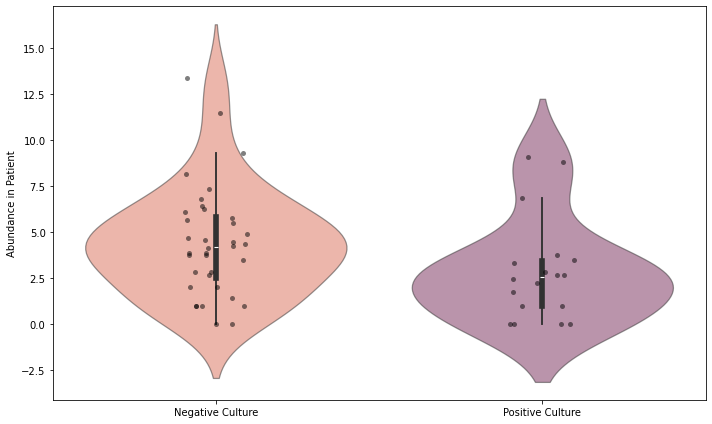

In [57]:
# Example usage
create_boxplot(merged1, "CS_Pseudomonas aeruginosa", "Pseudomonas aeruginosa")

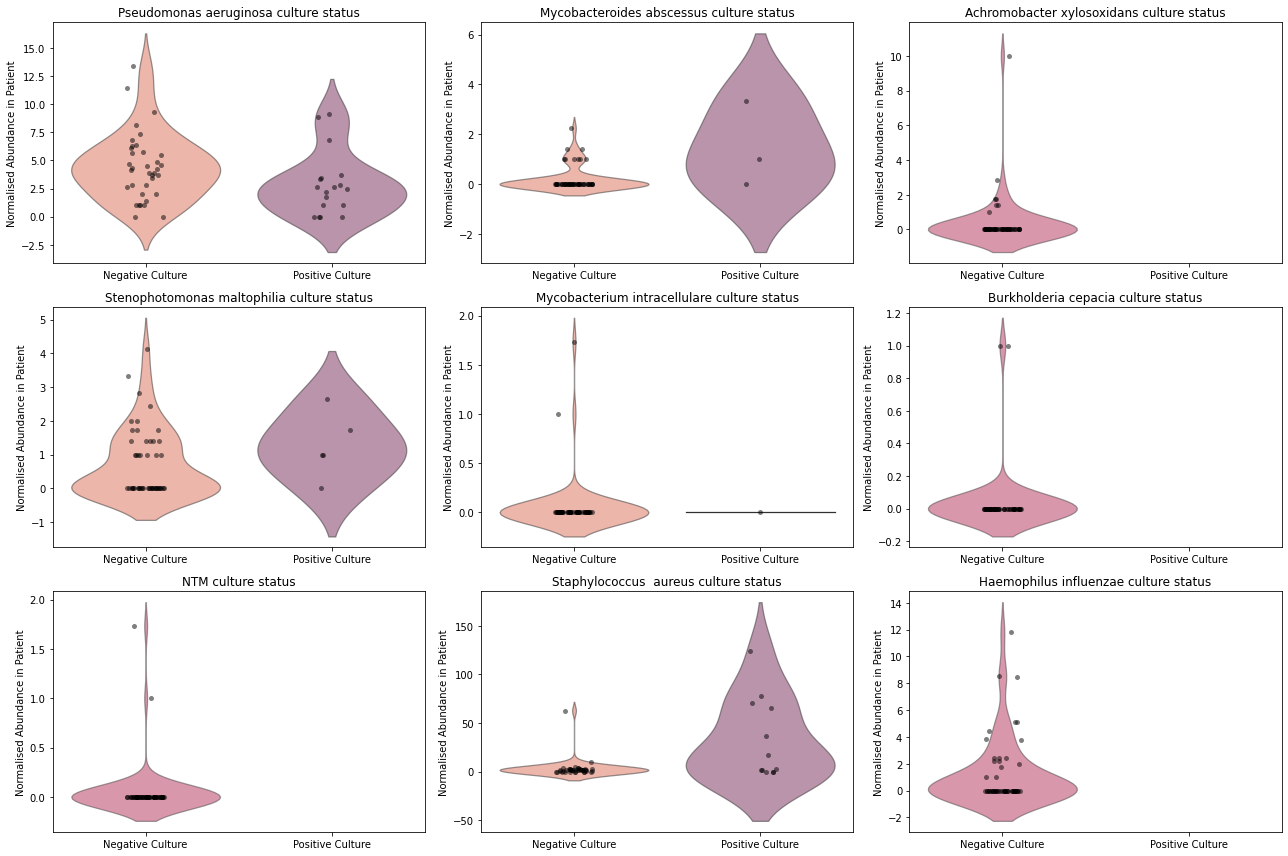

In [59]:
fig, ax = plt.subplots(figsize=(18, 12), nrows=3, ncols=3, sharex=False, sharey=False)

k = 0
for i in [0, 1, 2]:
    for j in [0, 1, 2]:
        culture_taxa = culture_columns[k]
        taxa = culture_pairs[culture_taxa]
        subset_data = merged1[merged1[culture_taxa].notna()]
        g = sns.violinplot(x=culture_taxa, y=taxa, data=subset_data, hue=culture_taxa, palette='rocket_r', alpha=0.5, ax=ax[j][i], legend=False, inner=None)
        g = sns.stripplot(x=culture_taxa, y=taxa, data=subset_data, color='black', jitter=True, alpha=0.5, ax=ax[j][i], legend=False)
        g.set_xlabel("")
        g.set_ylabel("Normalised Abundance in Patient")
        g.set_xlim(-0.5, 1.5)
        g.set_xticks(ticks=[0, 1], labels=["Negative Culture", "Positive Culture"])
        g.set_title(f"{culture_taxa.replace('CS_', '')} culture status")
        k+=1
        

plt.tight_layout()
plt.show()
fig.savefig('MinION_species_boxplots.png')  


In [ ]:
# Step 3: Additionally Stats Tests
# Perform Kruskal-Wallis Test
kruskal_stat, p_value = stats.kruskal(
    merged1.loc[merged1['CMS_Pseudomonas aeruginosa'] == 0.0, 'Pseudomonas aeruginosa'],
    merged1.loc[merged1['CMS_Pseudomonas aeruginosa'] == 1.0, 'Pseudomonas aeruginosa']
)
print(f'Kruskal-Wallis Test statistic: {kruskal_stat}, p-value: {p_value}')

In [37]:
# Calculate median
g__CMS_Pseudomonas_aeruginosa_median = merged1.groupby('CMS_Pseudomonas aeruginosa', observed=True)['Pseudomonas aeruginosa'].median()
print(g__CMS_Pseudomonas_aeruginosa_median)

CMS_Pseudomonas aeruginosa
0.0    4.182873
1.0    2.547621
Name: Pseudomonas aeruginosa, dtype: float64


In [38]:
# Filter to get the threshold value for hits in the "0" grouping
threshold_CMS_Pseudomonas_aeruginosa = g__CMS_Pseudomonas_aeruginosa_median.loc[1]
print(threshold_CMS_Pseudomonas_aeruginosa)

2.5476205269238843


In [39]:
# Find row names where the value is above the threshold
above_threshold_rownames_CMS_Pseudomonas_aeruginosa = merged1[
    (merged1['CMS_Pseudomonas aeruginosa'] == 0) &
    (merged1['Pseudomonas aeruginosa'] > threshold_CMS_Pseudomonas_aeruginosa)
].index.tolist()
# Print the row names
print(above_threshold_rownames_CMS_Pseudomonas_aeruginosa)

['642660_20180601_S', '658355_20171204_S', '658355_20180122_S', '676138_20180130_S', '715927_20180205_S', '748699_20180329_S', '748699_20180410_S', '753522_20180606_S', '756934_20181218_S', '763742_20180129_S', '768745_20171123_S', '770590_20180115_S', '778851_20171204_S', '785991_20171129_S', '785991_20171206_S', '785991_20180321_S', '788707_20181116_S', '825012_20181120_S', '825012_20181126_S', '875028_20180115_S', '892355_20180123_S', '1068841_20180306_S', '1586713_20180309_S', '1651490_20171010_S', '1651490_20180206_S', '1834617_20180501_S', '1845116_20180403_S']


In [40]:
# Save results to CSV
pd.DataFrame(above_threshold_rownames_CMS_Pseudomonas_aeruginosa).to_csv("CMS_Pseudomonas.aeruginosa.csv", index=False)

In [41]:
# Run pairwise Wilcoxon test on groups within a column


results = stats.wilcoxon(
    merged1['Pseudomonas aeruginosa'][merged1['CMS_Pseudomonas aeruginosa'] == 0],
    merged1['Pseudomonas aeruginosa'][merged1['CMS_Pseudomonas aeruginosa'] == 1]
)

p_adj = multipletests([results.pvalue], method='fdr_bh')[1][0]
print(f'Adjusted p-value for pairwise test: {p_adj}')


ValueError: The samples x and y must have the same length.

In [64]:
patients_with_both = merged1.groupby('Patient.x')['CS_Pseudomonas aeruginosa'].unique()
patients_with_both = patients_with_both[patients_with_both.apply(lambda x: set(x) == {0, 1})]
patients_with_both

Patient.x
658355    [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
748160    [1.0, 0.0]
Categories (2, float64): [0.0, 1.0]
Name: CS_Pseudomonas aeruginosa, dtype: object

In [69]:
merged1[merged1['Patient.x'] == 748160]['CS_Pseudomonas aeruginosa']


748160_20180321_S    1.0
748160_20180329_S    0.0
Name: CS_Pseudomonas aeruginosa, dtype: category
Categories (2, float64): [0.0, 1.0]

In [70]:
merged1[['Patient.x', 'CS_Pseudomonas aeruginosa']]

,Patient.x,CS_Pseudomonas aeruginosa
623361_20180123_S,623361,1.0
639354_20171206_S,639354,1.0
642660_20180601_S,642660,0.0
650003_20180207_S,650003,1.0
658355_20171204_S,658355,0.0
658355_20180122_S,658355,0.0
658355_20180321_S,658355,1.0
673895_20180122_S,673895,0.0
673895_20180205_S,673895,0.0
676138_20180130_S,676138,0.0
